![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [270]:
import plotly.express as px

In [271]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

### 3.1 Análise exploratória

In [272]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [273]:
df.shape

(10000, 14)

In [274]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [275]:
for col in df:
    a = px.histogram(df, x=col , color = 'Exited')
    a.show()


In [276]:
df1 = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

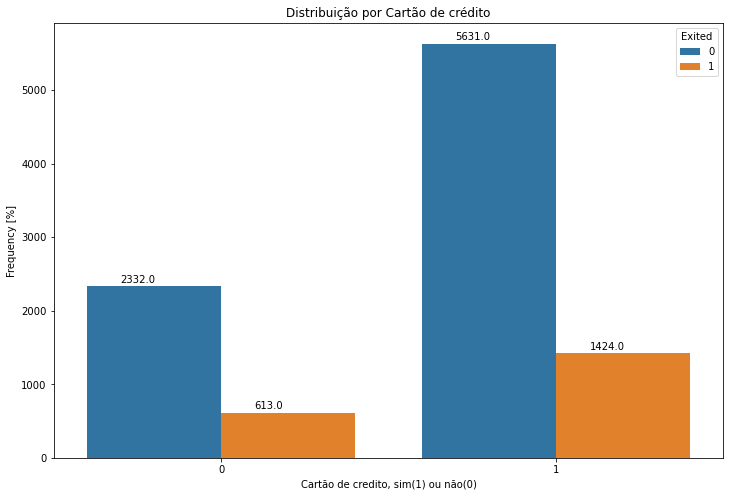

In [277]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x ="HasCrCard", hue = 'Exited', data=df)
plt.title('Distribuição por Cartão de crédito')
plt.xlabel('Cartão de credito, sim(1) ou não(0)')
plt.ylabel('Frequency [%]')



for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


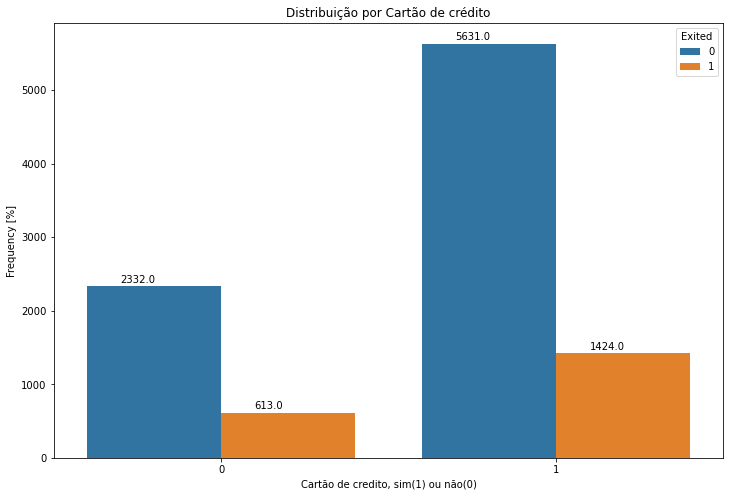

In [278]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x ="HasCrCard", hue = 'Exited', data=df)
plt.title('Distribuição por Cartão de crédito')
plt.xlabel('Cartão de credito, sim(1) ou não(0)')
plt.ylabel('Frequency [%]')



for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Text(0, 0.5, 'Frequency [%]')

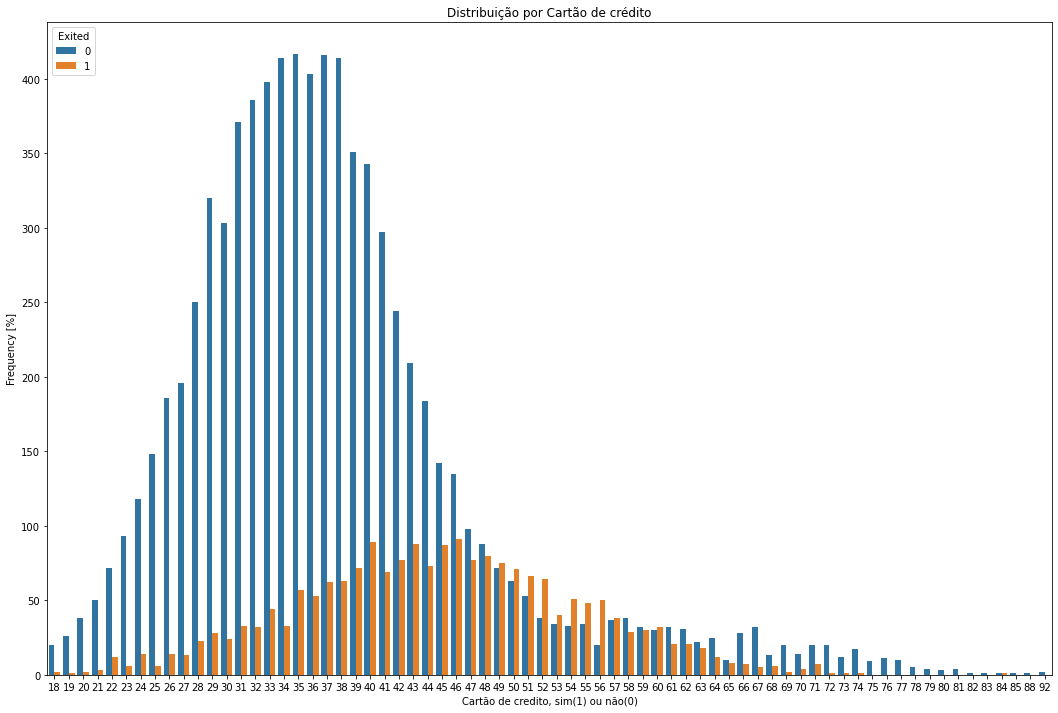

In [279]:
plt.figure(figsize=(18,12))
ax = sns.countplot(x ="Age", hue = 'Exited', data=df)
plt.title('Distribuição por Cartão de crédito')
plt.xlabel('Cartão de credito, sim(1) ou não(0)')
plt.ylabel('Frequency [%]')





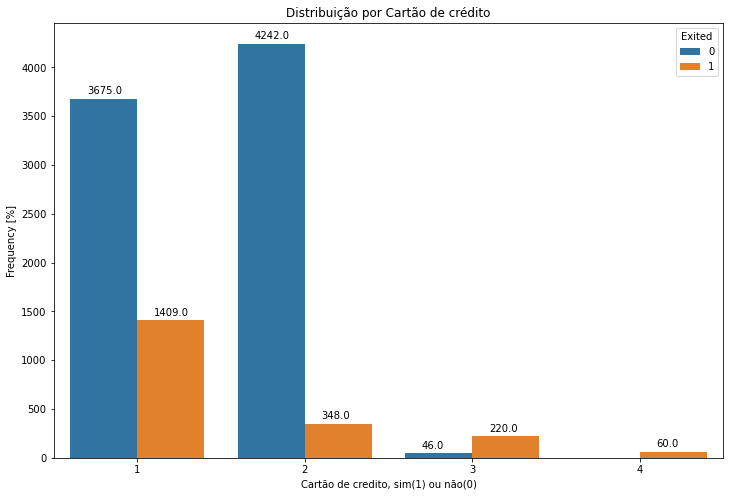

In [280]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x ="NumOfProducts", hue = 'Exited', data=df)
plt.title('Distribuição por Cartão de crédito')
plt.xlabel('Cartão de credito, sim(1) ou não(0)')
plt.ylabel('Frequency [%]')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))





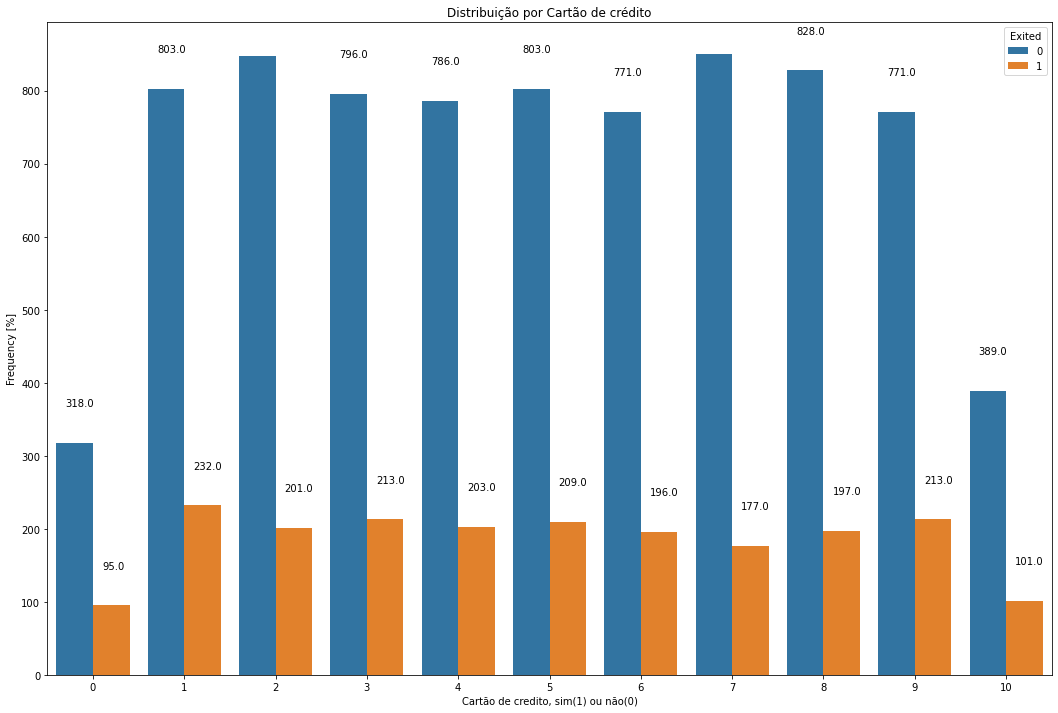

In [281]:
plt.figure(figsize=(18,12))
ax = sns.countplot(x ="Tenure", hue = 'Exited', data=df)
plt.title('Distribuição por Cartão de crédito')
plt.xlabel('Cartão de credito, sim(1) ou não(0)')
plt.ylabel('Frequency [%]')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


### 3.2 Preparação e limpeza dos dados

In [282]:
df['CustomerId'] = df['CustomerId'].apply(str)

In [283]:
df1 = df.drop(['Surname','CustomerId','RowNumber'], axis=1)

In [284]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [285]:
df1['Gender'] = df1['Gender'].replace('Female', 0)

df1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [286]:
df1['Gender'] = df1['Gender'].replace('Male', 1)

df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [287]:
df1.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [288]:
df1.Gender.unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64>

In [289]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [290]:
y = df1.Exited
x= df1.drop(['Exited','Tenure'], axis=1)

In [291]:
x = pd.get_dummies(x)
x.head()


,CreditScore,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,125510.82,1,1,1,79084.10,0,0,1


### 3.4 Construção do modelo

In [292]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [293]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(x_train,y_train)
y_pred = dummy_clf.predict(x_test)

In [294]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

In [295]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'Real')

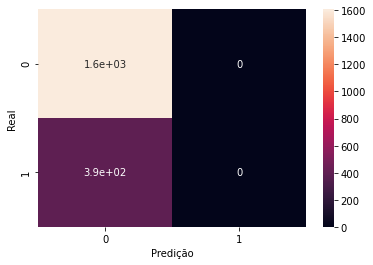

In [296]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predição')
plt.ylabel('Real')

In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\eduar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [298]:
y_proba = dummy_clf.predict_proba(x_test)
y_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [299]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba[:,1])

0.5

In [300]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [301]:
list_classificadores = [DecisionTreeClassifier(),
                        RandomForestClassifier(),
                        XGBClassifier()]

In [302]:
for clf in list_classificadores:
  print(clf.__class__.__name__)
  clf.fit(x_train, y_train)

  print('Acuracia')
  train_acc = clf.score(x_train,y_train)
  test_acc = clf.score(x_test,y_test)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')
  y_proba_train = clf.predict_proba(x_train)
  roc_train = roc_auc_score(y_train,y_proba_train[:,1])

  y_proba_test = clf.predict_proba(x_test)
  roc_test = roc_auc_score(y_test,y_proba_test[:,1])

  print('Treino:',roc_train)
  print('Test:',roc_test)
  print('-'*80)

DecisionTreeClassifier
Acuracia
Treino: 1.0
Teste: 0.7895
ROC AUC
Treino: 1.0
Test: 0.6863966647190806
--------------------------------------------------------------------------------
RandomForestClassifier
Acuracia
Treino: 1.0
Teste: 0.863
ROC AUC
Treino: 1.0
Test: 0.8595481600060803
--------------------------------------------------------------------------------
XGBClassifier
[22:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\eduar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Acuracia
Treino: 0.952125
Teste: 0.862
ROC AUC
Treino: 0.9887083913278486
Test: 0.8534069299233158
--------------------------------------------------------------------------------


In [303]:
clf = XGBClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

[22:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\eduar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



### 3.5 Avaliação do modelo

Text(33.0, 0.5, 'Real')

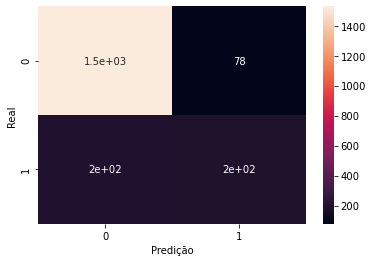

In [304]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predição')
plt.ylabel('Real')

In [305]:
df = pd.DataFrame(zip(x_train.columns,clf.feature_importances_),
                  columns=['colunas','importancia'])

In [306]:
df.sort_values('importancia',ascending=False).head(12)

,colunas,importancia
4,NumOfProducts,0.290078
6,IsActiveMember,0.205431
2,Age,0.119215
9,Geography_Germany,0.094149
3,Balance,0.055082
1,Gender,0.045825
10,Geography_Spain,0.041820
8,Geography_France,0.038402
7,EstimatedSalary,0.037365
0,CreditScore,0.036874


### 3.4 Otimização do modelo

In [310]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x_train,y_train)
yproba = clf.predict_proba(x_test)
roc_auc = roc_auc_score(y_test,yproba[:,1])

In [311]:
 roc_auc*100

73.2081811286816

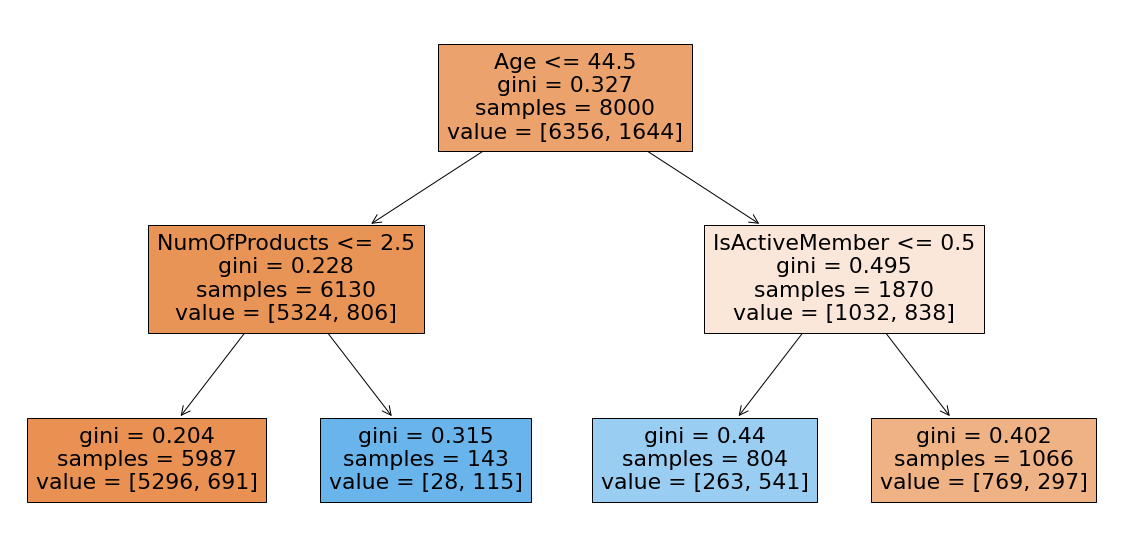

In [312]:
plt.figure(figsize=(20,10))
annotations = plot_tree(clf,feature_names=x_train.columns,filled=True)

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.